In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [17]:
# Load data to dataframe
data = np.load('LondonAQ.npz')
sites = data.keys() # ['GEltham', 'GWesthorne', 'BSladeGreen', 'GWoolwich']
headers = ['PM10', 'NO', 'NO2', 'O3', 'Wind Speed', 'month', 'dom', 'dow', 'hour', 'site']

df = pd.DataFrame(columns=headers)
site_idx = 0
for site in data.keys():
    shape = data[site].shape
    print(site, shape)
    site_data = np.empty((shape[0], shape[1] + 1))
    site_data.fill(site_idx)
    site_data[:,:-1] = data[site]
    site_df = pd.DataFrame(columns=headers, data=site_data)
    df = df.append(site_df)
    site_idx += 1

GEltham (43848, 9)
GWesthorne (43848, 9)
BSladeGreen (43848, 9)
GWoolwich (43848, 9)


In [14]:
df.head()

,PM10,NO,NO2,O3,Wind Speed,month,dom,dow,hour,site
0,12.4,0.0,5.7,54.4,2.8,1.0,1.0,6.0,0.0,0.0
1,7.4,0.4,5.7,51.9,2.9,1.0,1.0,6.0,1.0,0.0
2,9.7,0.0,5.7,51.2,2.2,1.0,1.0,6.0,2.0,0.0
3,3.3,0.0,4.8,51.9,2.7,1.0,1.0,6.0,3.0,0.0
4,4.4,0.0,3.3,51.4,2.4,1.0,1.0,6.0,4.0,0.0


In [6]:
# Missing values
train_data = df
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending = False)
missing_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
site,0,0.0
hour,0,0.0
dow,0,0.0
dom,0,0.0
month,0,0.0


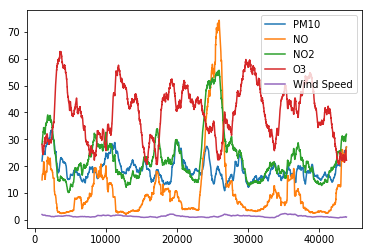

In [28]:
# Time series graph
site_0 = df[df['site'] == 0]
ts_cols = ['PM10', 'NO', 'NO2', 'O3', 'Wind Speed']
ts = pd.DataFrame(data=site_0[ts_cols], index=site_0.index, columns=ts_cols)
ts = ts.rolling(window=1000,center=False).mean()
plt.figure(); ts.plot(); plt.legend(loc='best')

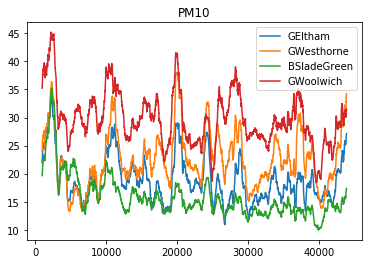

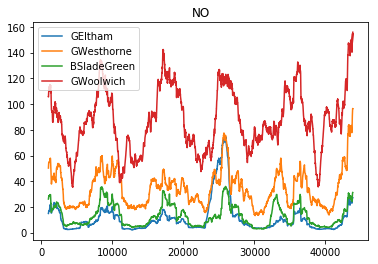

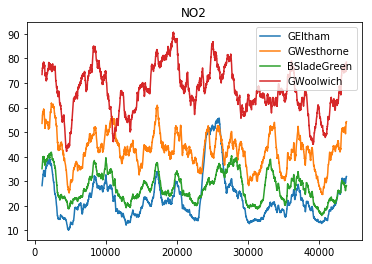

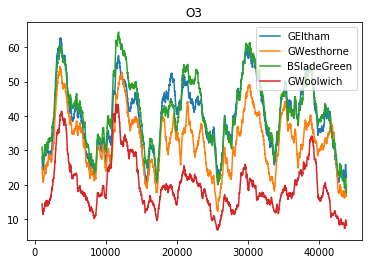

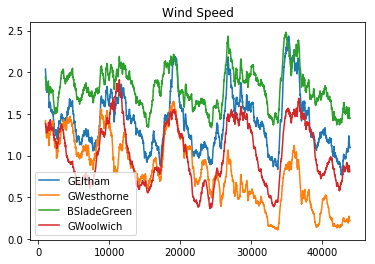

In [29]:

for col in ts_cols:
    ts = pd.DataFrame()

    for site in [0,1,2,3]:    
        site_col = df[df['site'] == site][col]
        ts[sites[site]] = site_col    

    ts = ts.rolling(window=1000,center=False).mean()
    plt.figure(); ts.plot(); plt.legend(loc='best'); plt.title(col);